<h1>K-Mean Clustring</h1>

K-Means Clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct, non-overlapping clusters based on similarity. The goal is to group data points such that points in the same cluster are more similar to each other than to those in other clusters.

<h3>K-Mean Clustring's Steps</h3>


1.   Decide n cluster (k)
2.   Initilize centroids
3.   Assign clustring
4.   Move Centroids
5.  Finish



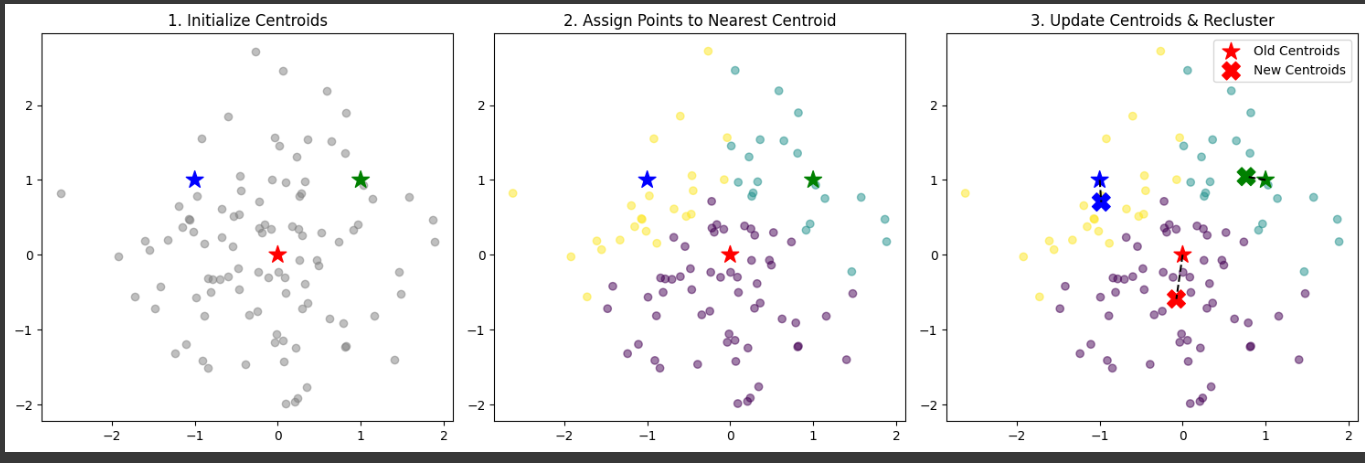

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.datasets import make_blobs

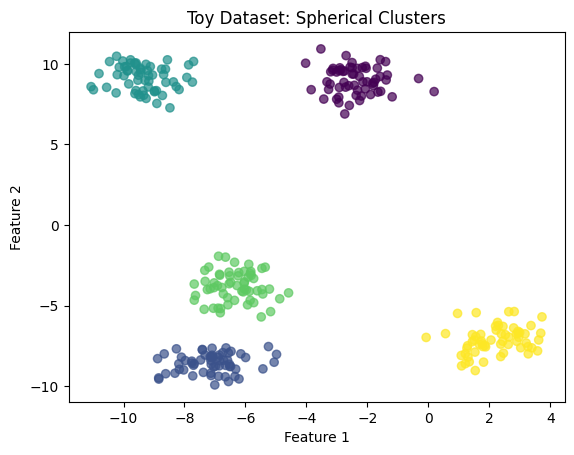

In [273]:
# Generate 3 spherical clusters
X, y = make_blobs(
    n_samples=300,  # Total points
    n_features=5,   # 2D data
    centers=5,      # Number of clusters
    cluster_std=0.8, # Cluster spread
    random_state=42
)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("Toy Dataset: Spherical Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [274]:
df = pd.DataFrame(X,y)
df.head()

,0,1,2,3,4
0,-2.569841,9.792657,5.276355,3.169517,-6.609082
1,-7.096272,-8.080234,7.123425,3.063142,3.620321
0,-1.347157,9.303897,5.104930,1.469409,-6.178223
1,-8.099542,-8.200139,6.412210,2.236494,6.388473
2,-7.923258,9.154554,6.725109,-5.609988,-5.877447


In [275]:
from sklearn.cluster import KMeans

   <h1>The Importance of the Elbow Method in K-Means Clustering</h1>
    
  <p>The <strong>Elbow Method</strong> is a fundamental technique used to determine the optimal number of clusters (K) in K-Means clustering. Since K-Means requires K as an input, choosing the right value is crucial for meaningful results.</p>
    
  <h2>Why is the Elbow Method Important?</h2>
        
  <h3>1. Prevents Arbitrary Selection of K</h3>
        <ul>
            <li>K-Means does not automatically determine the best number of clusters</li>
            <li>Guessing K can lead to poor clustering (too few or too many clusters)</li>
            <li>The Elbow Method provides a data-driven approach to selecting K</li>
        </ul>
        
  <h3>2. Balances Between Underfitting and Overfitting</h3>
        <ul>
            <li><strong>Too few clusters (low K):</strong> Oversimplifies data, merging distinct groups (high within-cluster variance)</li>
            <li><strong>Too many clusters (high K):</strong> Overfits the data, creating artificial splits (loses generalization)</li>
        </ul>
        
  <h3>3. Uses the "Elbow Point" to Find Optimal K</h3>
        <ul>
            <li>Plots Within-Cluster Sum of Squares (WCSS) vs. number of clusters (K)</li>
            <li>WCSS measures cluster compactness (lower = tighter clusters)</li>
            <li>The "elbow point" (where the rate of decrease sharply changes) indicates the best K</li>
        </ul>

In [276]:
wcss = [] #within the cluster sum of squares
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)
wcss

[37447.24709078079,
 15177.970367328166,
 7937.398379370027,
 4392.87287625224,
 926.2905738562579,
 889.2599902323523,
 844.3021156678994,
 814.6365485170983,
 812.9399011030898,
 746.5435055695316]

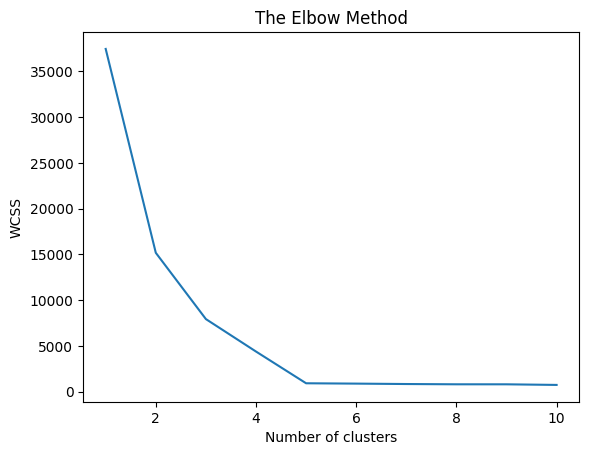

In [277]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [285]:
X = df.iloc[:,:].values #Extract array
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)
y_means

array([4, 0, 4, 0, 1, 4, 0, 3, 0, 1, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2, 2, 0,
       1, 1, 4, 0, 4, 2, 3, 0, 1, 1, 1, 4, 4, 2, 3, 3, 0, 1, 2, 2, 1, 1,
       0, 1, 0, 3, 2, 0, 0, 1, 1, 1, 2, 3, 4, 2, 4, 0, 2, 1, 0, 0, 1, 0,
       1, 3, 1, 2, 4, 2, 1, 1, 3, 0, 4, 4, 4, 1, 3, 0, 4, 4, 2, 0, 3, 0,
       4, 2, 4, 3, 1, 1, 4, 2, 2, 4, 4, 3, 4, 0, 2, 1, 1, 2, 2, 4, 1, 2,
       0, 3, 4, 4, 4, 4, 4, 0, 3, 0, 2, 4, 1, 4, 4, 2, 4, 3, 4, 2, 1, 3,
       4, 4, 4, 0, 2, 3, 1, 2, 4, 3, 3, 3, 4, 0, 1, 0, 3, 3, 0, 0, 0, 3,
       2, 4, 3, 1, 4, 3, 0, 0, 2, 4, 4, 0, 0, 2, 3, 1, 3, 1, 2, 2, 0, 3,
       0, 4, 4, 4, 3, 2, 0, 2, 3, 4, 1, 3, 1, 3, 4, 3, 4, 0, 3, 2, 2, 0,
       4, 0, 0, 3, 2, 0, 2, 2, 1, 3, 1, 3, 0, 0, 0, 1, 2, 3, 0, 1, 2, 2,
       2, 4, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 2, 4,
       3, 1, 1, 3, 4, 3, 2, 0, 2, 2, 3, 3, 4, 0, 4, 2, 3, 3, 2, 2, 0, 2,
       1, 3, 0, 3, 4, 1, 0, 4, 4, 3, 1, 3, 0, 1, 3, 1, 2, 0, 0, 2, 3, 0,
       4, 0, 4, 2, 4, 3, 0, 2, 0, 0, 2, 4, 1, 0], d

In [279]:
X[y_means == 2,1]

array([-7.39024001, -8.60030659, -8.1631549 , -7.81084723, -6.73887723,
       -6.74779438, -6.22848274, -7.49253563, -6.96682185, -6.66449523,
       -6.27554861, -7.88473127, -7.47528783, -7.54837236, -7.95061947,
       -7.36815097, -6.04562783, -6.94910305, -6.60036407, -6.92275527,
       -8.5085595 , -8.74060793, -7.40122739, -7.6158091 , -9.03122159,
       -7.55896558, -8.09516933, -6.78636828, -5.70083107, -5.43872157,
       -6.74871633, -7.99485674, -7.21136319, -7.19757342, -5.36979472,
       -7.63725007, -6.29219532, -8.48943198, -7.13297581, -7.62183603,
       -6.38527246, -6.7112837 , -7.41049722, -6.80713395, -7.14510131,
       -7.13808852, -5.37917713, -6.80391665, -5.48552826, -6.23853948,
       -7.21575703, -7.32215707, -7.23487398, -6.72441791, -6.51964261,
       -7.98333641, -7.53886771, -8.19689727, -6.75536998, -6.97550734])

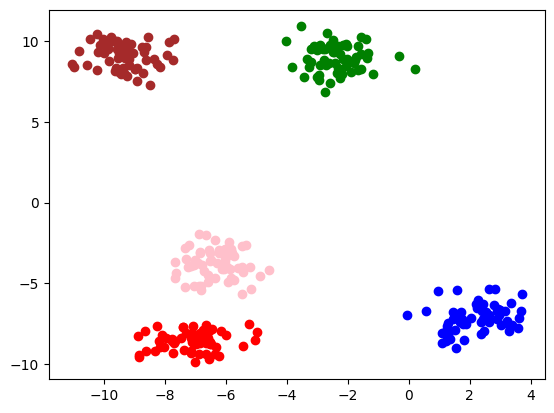

In [280]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1], color='red')
plt.scatter(X[y_means ==1,0],X[y_means ==1,1],color='green')
plt.scatter(X[y_means ==2,0],X[y_means ==2,1],color='blue')
plt.scatter(X[y_means ==3,0],X[y_means ==3,1],color='brown')
plt.scatter(X[y_means ==4,0],X[y_means ==4,1],color='pink')

<h1>KMeans Class</h1>

In [284]:
import numpy as np
import random

class myKMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        """
        Initialize the K-Means clustering algorithm.

        Parameters:
        -----------
        n_clusters : int, optional (default=2)
            The number of clusters to form.
        max_iter : int, optional (default=100)
            Maximum number of iterations for the algorithm.
        """
        self.n_clusters = n_clusters  # Number of clusters (K)
        self.max_iter = max_iter      # Maximum iterations allowed
        self.centroids = None         # Will store cluster centers

    def fit_predict(self, X):
        """
        Fit the model to the data and predict cluster labels.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data to cluster.

        Returns:
        --------
        cluster_group : array, shape (n_samples,)
            Cluster labels for each sample.
        """
        # Step 1: Initialize centroids randomly by selecting K random points from the dataset
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        # Main K-Means algorithm loop
        for i in range(self.max_iter):
            # Step 2: Assign each data point to the nearest centroid
            cluster_group = self.assign_clusters(X)

            # Store current centroids for convergence check
            old_centroids = self.centroids

            # Step 3: Recalculate centroids as mean of assigned points
            self.centroids = self.move_centroids(X, cluster_group)

            # Step 4: Check for convergence (if centroids don't change)
            if (old_centroids == self.centroids).all():
                break  # Exit loop if centroids have converged

        return cluster_group

    def assign_clusters(self, X):
        """
        Assign each data point to the nearest centroid.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data.

        Returns:
        --------
        cluster_group : array, shape (n_samples,)
            Cluster indices for each data point.
        """
        cluster_group = []  # Will store cluster assignments
        distances = []      # Temporary storage for distances to centroids

        for row in X:
            # Calculate distance to each centroid
            for centroid in self.centroids:
                # Euclidean distance: sqrt((x1-x2)² + (y1-y2)² + ...)
                distances.append(np.sqrt(np.dot(row-centroid, row-centroid)))

            # Find the nearest centroid
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()  # Reset for next data point

        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        """
        Update centroids to be the mean of their assigned points.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data.
        cluster_group : array-like, shape (n_samples,)
            Current cluster assignments.

        Returns:
        --------
        new_centroids : array, shape (n_clusters, n_features)
            Updated centroids.
        """
        new_centroids = []
        cluster_type = np.unique(cluster_group)  # Get unique cluster indices

        for type in cluster_type:
            # Calculate mean of all points assigned to this cluster
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

In [282]:
k = myKMeans(n_clusters=5)
y_Kmeans =k.fit_predict(X)

Text(0.5, 1.0, 'by skleanr')

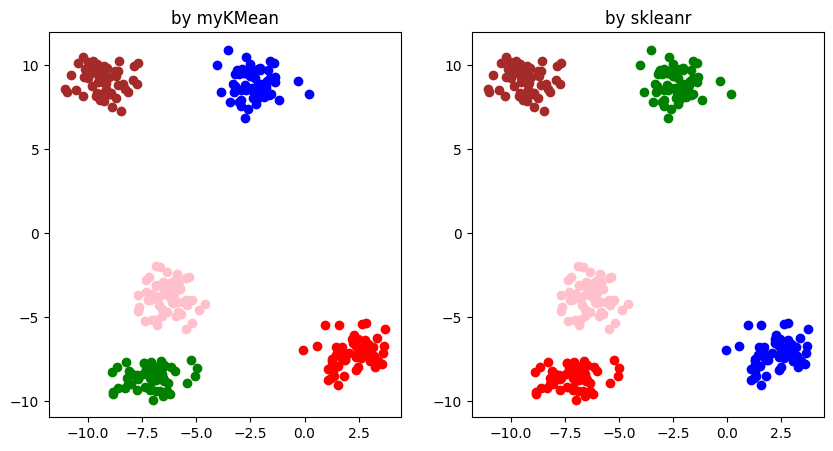

In [283]:
fig,ax =plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(X[y_Kmeans == 0,0],X[y_Kmeans == 0,1], color='red')
ax[0].scatter(X[y_Kmeans ==1,0],X[y_Kmeans ==1,1],color='green')
ax[0].scatter(X[y_Kmeans ==2,0],X[y_Kmeans ==2,1],color='blue')
ax[0].scatter(X[y_Kmeans ==3,0],X[y_Kmeans ==3,1],color='brown')
ax[0].scatter(X[y_Kmeans ==4,0],X[y_Kmeans ==4,1],color='pink')
ax[0].set_title("by myKMean")

ax[1].scatter(X[y_means == 0,0],X[y_means == 0,1], color='red')
ax[1].scatter(X[y_means ==1,0],X[y_means ==1,1],color='green')
ax[1].scatter(X[y_means ==2,0],X[y_means ==2,1],color='blue')
ax[1].scatter(X[y_means ==3,0],X[y_means ==3,1],color='brown')
ax[1].scatter(X[y_means ==4,0],X[y_means ==4,1],color='pink')
ax[1].set_title("by skleanr")